In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
X = boston.data
Y = boston.target

In [5]:
names = boston.feature_names

In [6]:
names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='|S7')

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X)

In [8]:
dfX0 = pd.DataFrame(X_scaled,columns=names)

In [9]:
dfX0.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000736,0.772552,0.337051,0.0,4.647422,9.367131,2.318549,1.94426,0.11496,1.758028,7.074146,4.351754,0.698065


In [10]:
dfX = sm.add_constant(dfX0)

In [11]:
dfY = pd.DataFrame(Y, columns=["MEDV"])

In [12]:
df = pd.concat([dfX, dfY],axis=1)

In [13]:
df.tail()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,1,0.007292,0.0,1.740698,0.0,4.949763,9.392775,2.457236,1.178250,0.11496,1.621424,9.709612,4.297919,1.355480,22.4
502,1,0.005271,0.0,1.740698,0.0,4.949763,8.718911,2.727496,1.087407,0.11496,1.621424,9.709612,4.351754,1.272778,20.6
503,1,0.007075,0.0,1.740698,0.0,4.949763,9.938419,3.236012,1.030363,0.11496,1.621424,9.709612,4.351754,0.790580,23.9
504,1,0.012760,0.0,1.740698,0.0,4.949763,9.679131,3.175559,1.135609,0.11496,1.621424,9.709612,4.313927,0.908326,22.0
505,1,0.005520,0.0,1.740698,0.0,4.949763,8.590692,2.873294,1.190800,0.11496,1.621424,9.709612,4.351754,1.104569,11.9


In [14]:
# 그림저장에 default가 svg로 저장이 되게 한다.
# png, jpg
%config InlineBackend.figure_format = "png"

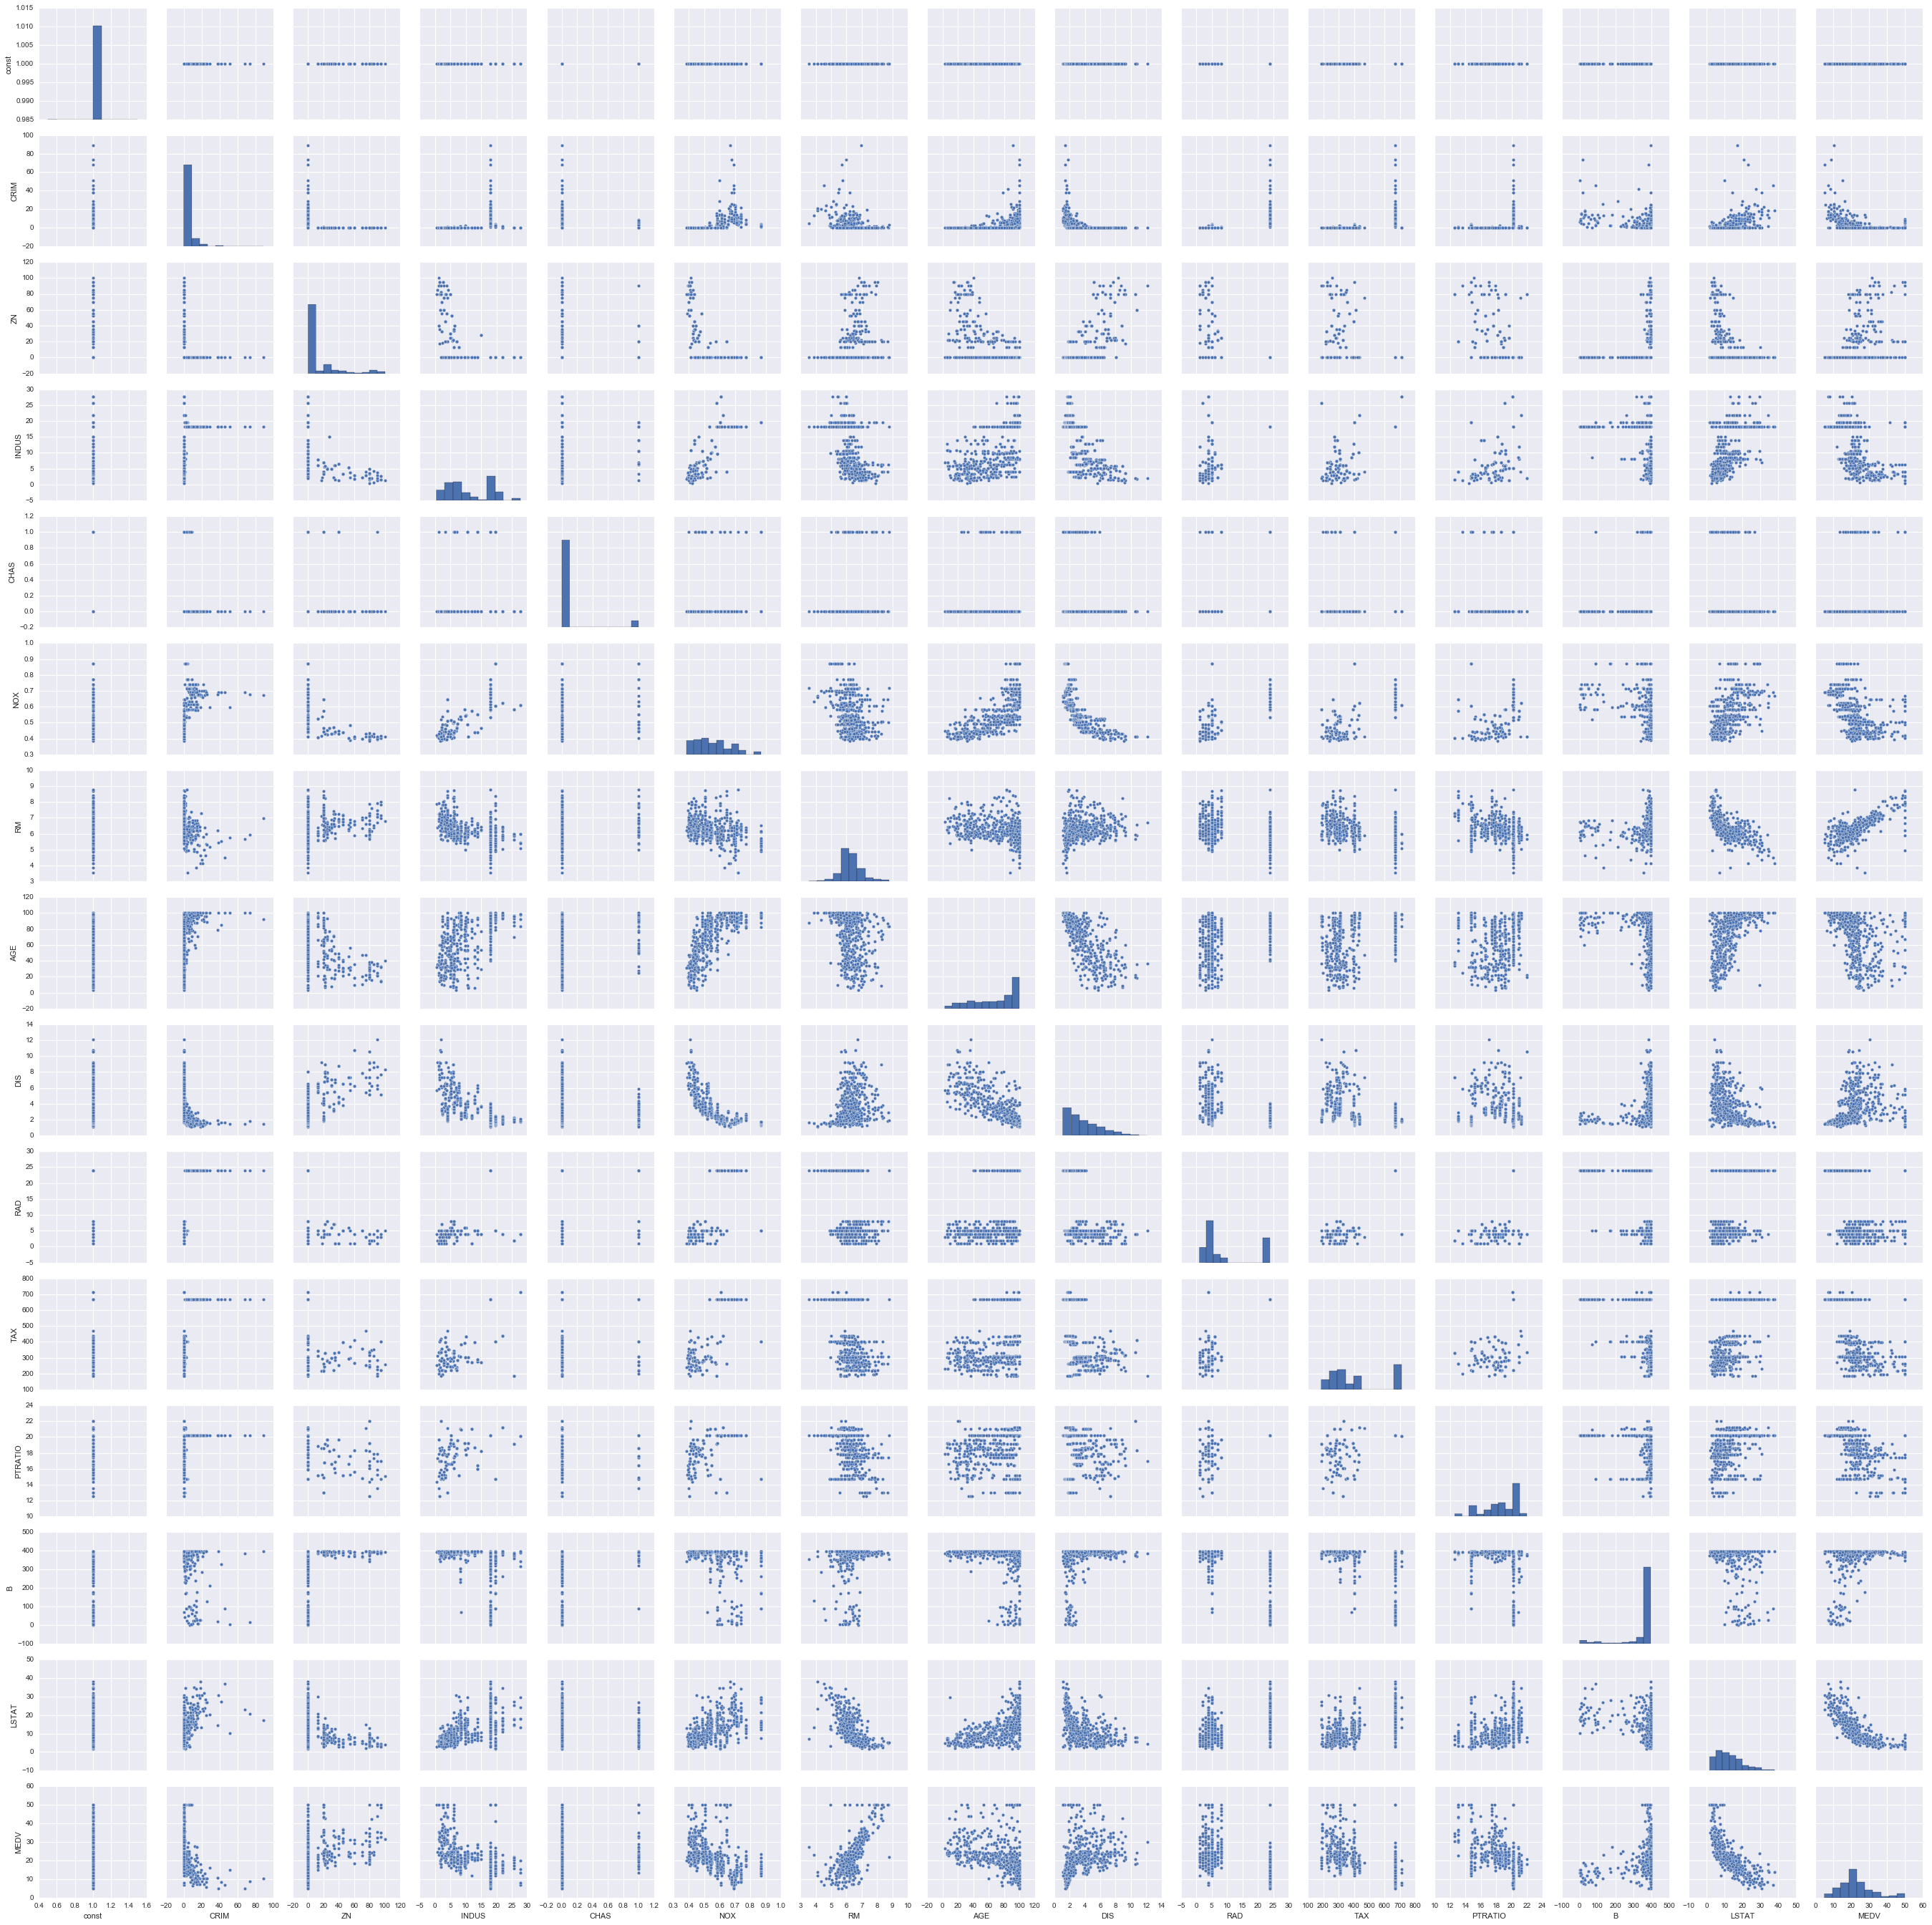

In [22]:
sns.pairplot(df)

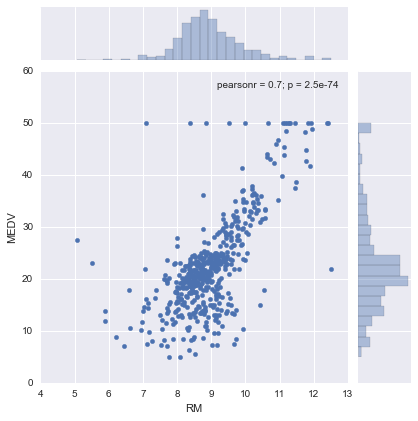

In [15]:
sns.jointplot("RM","MEDV",data=df)
plt.show()

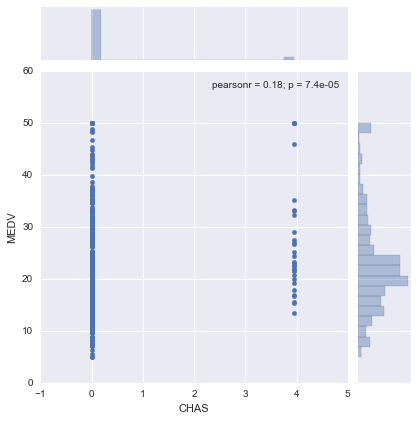

In [16]:
# CHAS 는 찰스강에 붙어잇냐 아니냐를 나타내는 카테고리 값이었다.
sns.jointplot("CHAS","MEDV" ,data=df)
plt.show()

In [17]:
regression = sm.OLS(dfY, dfX)

In [18]:
result = regression.fit()

In [19]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 12 Jun 2016   Prob (F-statistic):          6.95e-135
Time:                        14:39:34   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

# 강사님

In [80]:
model = sm.OLS(df.ix[:,-1], df.ix[:,:-1])

In [81]:
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 08 Jun 2016   Prob (F-statistic):          6.95e-135
Time:                        04:46:26   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

# 강사님. 사이킷런이용한 회귀

In [23]:
from sklearn.linear_model import LinearRegression
model_boston = LinearRegression().fit(df.ix[:,:-1],df.ix[:,-1])

In [24]:
model_boston.intercept_, model_boston.coef_

(36.491103280361443,
 array([ 0.        , -0.92041113,  1.08098058,  0.14296712,  0.68220346,
        -2.06009246,  2.67064141,  0.02112063, -3.10444805,  2.65878654,
        -2.07589814, -2.06215593,  0.85664044, -3.74867982]))

TypeError: invalid type comparison

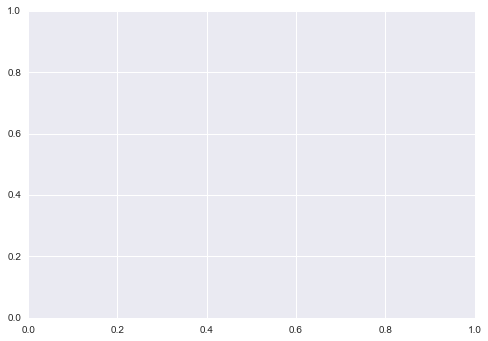

In [29]:
sm.graphics.plot_fit(result, df.MEDV)
plt.show()

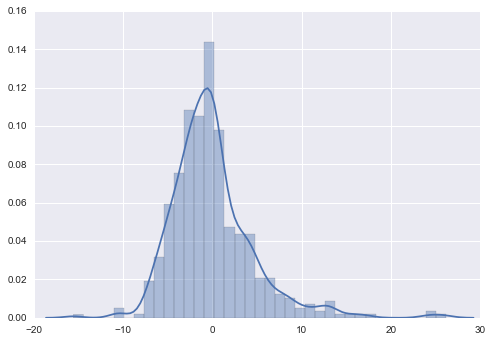

In [85]:
sns.distplot(result.resid)

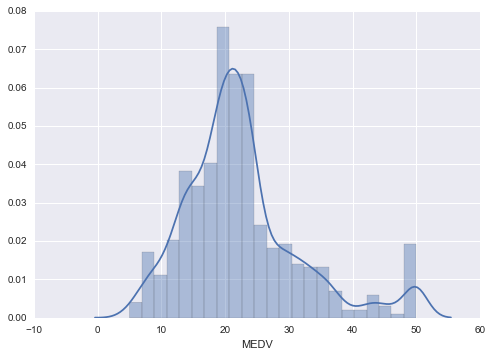

In [86]:
sns.distplot(df.MEDV)

In [30]:
df2 = df.drop(df[df.MEDV >= df.MEDV.max()].index)
df2.head(1)

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1,0.000736,0.772552,0.337051,0.0,4.647422,9.367131,2.318549,1.94426,0.11496,1.758028,7.074146,4.351754,0.698065,24.0


In [31]:
sm_model2 = sm.OLS(df2.ix[:,-1],df2.ix[:,:-1])
result2 = sm_model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     128.0
Date:                Sun, 12 Jun 2016   Prob (F-statistic):          4.79e-146
Time:                        14:43:00   Log-Likelihood:                -1337.1
No. Observations:                 490   AIC:                             2702.
Df Residuals:                     476   BIC:                             2761.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.2611      4.125      7.821      0.0

In [32]:
from sklearn.linear_model import LinearRegression
sk_model2 = LinearRegression().fit(df2.ix[:,:-1],df2.ix[:,-1])
sk_model2.coef_, sk_model2.intercept_

(array([ 0.        , -0.90670198,  0.8218828 , -0.29825317,  0.11555586,
        -1.43856592,  2.63509594, -0.66398505, -2.54724295,  2.18110049,
        -2.31851126, -1.81435162,  0.72377893, -2.5036931 ]),
 32.261106875317672)

In [33]:
import statsmodels.api as sm
model_anova = sm.OLS.from_formula("MEDV ~ C(CHAS)", data=df2)
result_anova = model_anova.fit()
table_anova = sm.stats.anova_lm(result_anova)
table_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(CHAS),1.0,169.271183,169.271183,2.745998,0.098141
Residual,488.0,30081.716653,61.642862,NaN,NaN


# Cross Validation

In [100]:
model2 = LinearRegression()

In [102]:
fit_model2 = model2.fit(df2.ix[:,:-1],df2.ix[:,-1])

In [104]:

fit_model2.coef_, fit_model2.intercept_

(array([ 0.        , -0.90670198,  0.8218828 , -0.29825317,  0.11555586,
        -1.43856592,  2.63509594, -0.66398505, -2.54724295,  2.18110049,
        -2.31851126, -1.81435162,  0.72377893, -2.5036931 ]),
 32.261106875317672)

In [108]:
from sklearn.cross_validation import cross_val_score

scores2 = cross_val_score(model2, df2.ix[:,:-1], df2.ix[:,-1], cv = 5 ) # cv = 5 , k가 5인 k-fold cv를 시행.

In [110]:
scores2, scores2.mean(), scores2.std()

(array([ 0.670774  ,  0.77345121,  0.5308856 ,  0.00644914,  0.11065571]),
 0.41844313129206878,
 0.30555426893282145)

# 안 좋은걸 좋게 만들어봅시다..ㅠㅠㅠ

In [112]:
# 이 모델의 점수는 0.418.. 입니당. 어떻게 바꿀까?


In [113]:
# MEDV 와 LSTAT이 반 비례의 2차함수같네??
# 이차항을 해주면 되겟네?

# 로그를 취해줘도 된다.

# CRIM, DIS(헤테로스키더스키? 하다. 갈수록 분산증가) 


# log transform

In [114]:
df3 = df2.drop(["CRIM","DIS","LSTAT","MEDV"], axis=1)
df3["LOGCRIM"] = np.log(df2.CRIM)
df3["LOGDIS"] = np.log(df2.DIS)
df3["LOGLSTAT"] = np.log(df2.LSTAT)
df3["MEDV"] = df2.MEDV

In [115]:
df3.tail()

,const,ZN,INDUS,CHAS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LOGCRIM,LOGDIS,LOGLSTAT,MEDV
501,1,0.0,1.740698,0.0,4.949763,9.392775,2.457236,0.11496,1.621424,9.709612,4.297919,-4.920910,0.164030,0.304156,22.4
502,1,0.0,1.740698,0.0,4.949763,8.718911,2.727496,0.11496,1.621424,9.709612,4.351754,-5.245510,0.083796,0.241202,20.6
503,1,0.0,1.740698,0.0,4.949763,9.938419,3.236012,0.11496,1.621424,9.709612,4.351754,-4.951222,0.029911,-0.234988,23.9
504,1,0.0,1.740698,0.0,4.949763,9.679131,3.175559,0.11496,1.621424,9.709612,4.313927,-4.361408,0.127169,-0.096152,22.0
505,1,0.0,1.740698,0.0,4.949763,8.590692,2.873294,0.11496,1.621424,9.709612,4.351754,-5.199321,0.174625,0.099456,11.9


In [116]:
df2.tail()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,1,0.007292,0.0,1.740698,0.0,4.949763,9.392775,2.457236,1.178250,0.11496,1.621424,9.709612,4.297919,1.355480,22.4
502,1,0.005271,0.0,1.740698,0.0,4.949763,8.718911,2.727496,1.087407,0.11496,1.621424,9.709612,4.351754,1.272778,20.6
503,1,0.007075,0.0,1.740698,0.0,4.949763,9.938419,3.236012,1.030363,0.11496,1.621424,9.709612,4.351754,0.790580,23.9
504,1,0.012760,0.0,1.740698,0.0,4.949763,9.679131,3.175559,1.135609,0.11496,1.621424,9.709612,4.313927,0.908326,22.0
505,1,0.005520,0.0,1.740698,0.0,4.949763,8.590692,2.873294,1.190800,0.11496,1.621424,9.709612,4.351754,1.104569,11.9


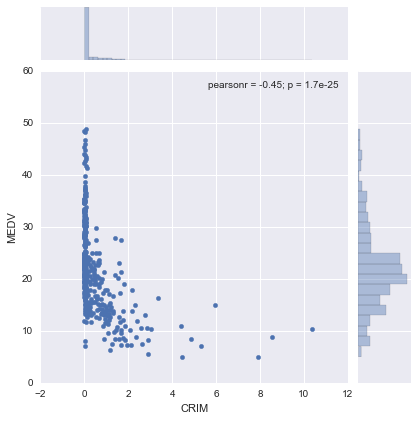

In [117]:
sns.jointplot("CRIM","MEDV", data=df2)

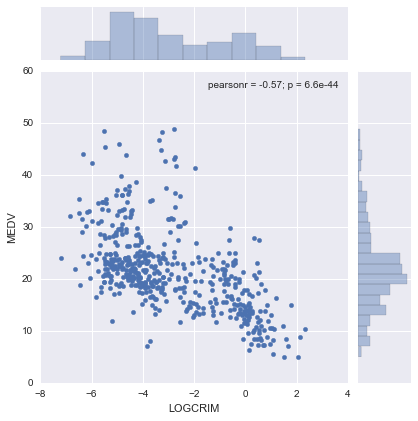

In [118]:
sns.jointplot("LOGCRIM","MEDV", data=df3)

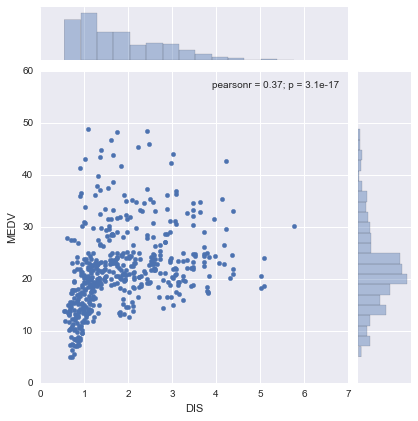

In [119]:
sns.jointplot("DIS","MEDV", data=df2)

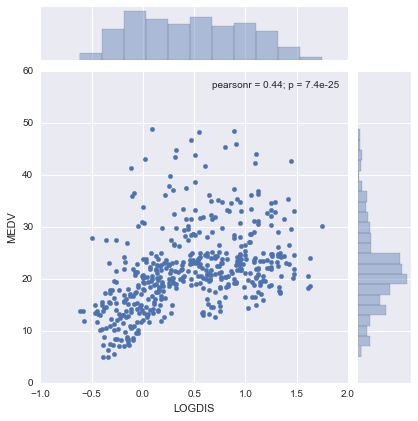

In [120]:
sns.jointplot("LOGDIS","MEDV", data=df3)

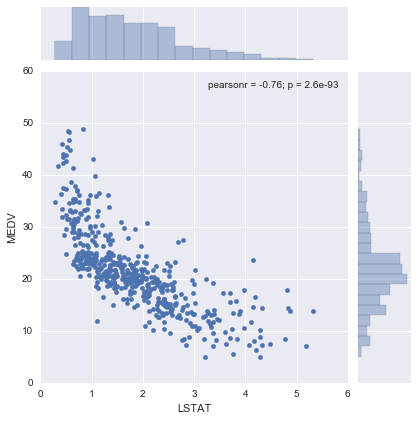

In [121]:
sns.jointplot("LSTAT","MEDV", data=df2)

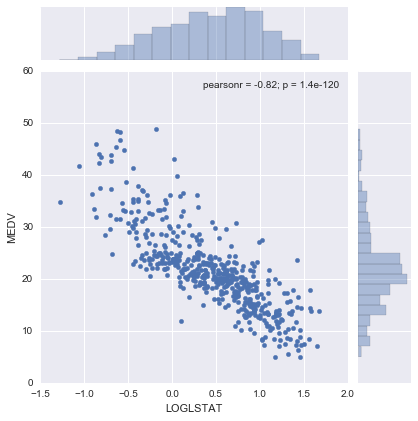

In [122]:
sns.jointplot("LOGLSTAT","MEDV", data=df3)

In [123]:
model3 = sm.OLS(df3.ix[:,-1],df3.ix[:,:-1])

In [124]:
result = model3.fit()

In [125]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     143.8
Date:                Wed, 08 Jun 2016   Prob (F-statistic):          1.91e-155
Time:                        08:13:57   Log-Likelihood:                -1314.7
No. Observations:                 490   AIC:                             2657.
Df Residuals:                     476   BIC:                             2716.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.5248      3.930      7.767      0.0

In [126]:
scores3 = cross_val_score(LinearRegression(), df3.ix[:,:-1],df3.ix[:,-1],cv=5)
scores3, scores3.mean(), scores3.std()

(array([ 0.68959667,  0.78222319,  0.58690158,  0.13525116,  0.24691975]),
 0.48817847061802622,
 0.2528008298676635)

In [127]:
# 평균 점수도 높아지고 분산도 적어졌다!!!

In [128]:
# 지금 데이터셋에는 다중공선성이 있다.

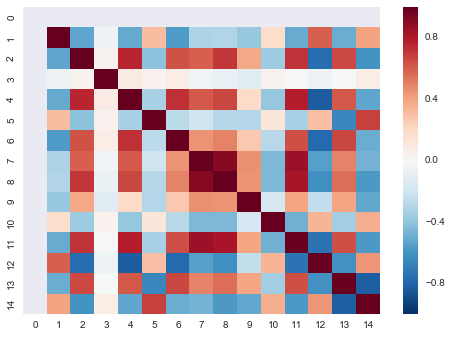

In [130]:
# correlation 보기.
sns.heatmap(np.corrcoef(df3.T))

In [131]:
# t-test 결과만 갖고 잘라내기 (원래는 F-test도 봐야하지만..)
df4 = df3.drop(["ZN","INDUS","AGE","LOGCRIM"],axis=1)

In [132]:
model4 = sm.OLS(df4.ix[:,-1],df4.ix[:,:-1])
result4 = model4.fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     209.1
Date:                Wed, 08 Jun 2016   Prob (F-statistic):          6.89e-160
Time:                        08:23:35   Log-Likelihood:                -1315.0
No. Observations:                 490   AIC:                             2650.
Df Residuals:                     480   BIC:                             2692.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.2476      3.737      8.361      0.0

In [133]:
score4 = cross_val_score(LinearRegression(), df4.ix[:,:-1],df4.ix[:,-1], cv=5)
score4, score4.mean(), score4.std()

(array([ 0.72319109,  0.78563139,  0.61497277,  0.26420584,  0.30413905]),
 0.53842802863758932,
 0.21503261199735343)

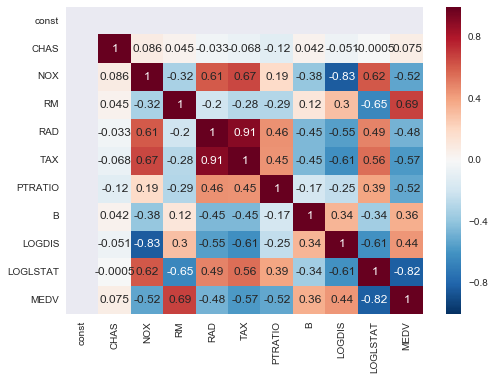

In [140]:
sns.heatmap(np.corrcoef(df4.T), xticklabels=df4.columns, yticklabels=df4.columns, annot=True)

In [137]:
sns.heatmap?

In [141]:
df5 = df4.drop(["RAD"],axis=1)

In [142]:
model5 = sm.OLS(df5.ix[:,-1],df5.ix[:,:-1])
result5 = model5.fit()
print(result5.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     225.8
Date:                Wed, 08 Jun 2016   Prob (F-statistic):          1.60e-157
Time:                        08:36:35   Log-Likelihood:                -1323.4
No. Observations:                 490   AIC:                             2665.
Df Residuals:                     481   BIC:                             2702.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.8265      3.636      7.379      0.0

In [143]:
score5 = cross_val_score(LinearRegression(), df5.ix[:,:-1],df5.ix[:,-1], cv=5)
score5, score5.mean(), score5.std()

(array([ 0.72444307,  0.75982829,  0.57680467,  0.25469516,  0.32560728]),
 0.52827569419364395,
 0.20512147639406775)

In [144]:
df6 = df5.drop(["TAX"],axis=1)
model6 = sm.OLS(df6.ix[:,-1],df6.ix[:,:-1])
result6 = model6.fit()
print(result6.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     251.8
Date:                Wed, 08 Jun 2016   Prob (F-statistic):          1.43e-156
Time:                        08:38:41   Log-Likelihood:                -1328.5
No. Observations:                 490   AIC:                             2673.
Df Residuals:                     482   BIC:                             2706.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.6735      3.623      7.915      0.0

In [145]:
score6 = cross_val_score(LinearRegression(), df6.ix[:,:-1],df6.ix[:,-1], cv=5)
score6, score6.mean(), score6.std()

(array([ 0.7160077 ,  0.7598543 ,  0.56232156,  0.23754958,  0.39348215]),
 0.53384305959027156,
 0.19624834931434523)

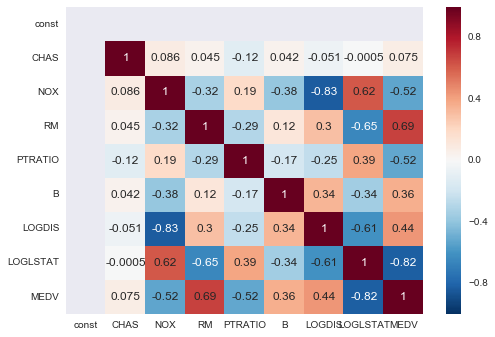

In [146]:
sns.heatmap(np.corrcoef(df6.T), xticklabels=df6.columns, yticklabels=df6.columns, annot=True)